## Q3 data quality issue

### Import data

In [1]:
#library
import json
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
receipts = []
for line in open('receipts.json','r'):
    line = json.loads(line)
    #print(line)
    receipts.append(line)

In [3]:
receipts

[{'_id': {'$oid': '5ff1e1eb0a720f0523000575'},
  'bonusPointsEarned': 500,
  'bonusPointsEarnedReason': 'Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)',
  'createDate': {'$date': 1609687531000},
  'dateScanned': {'$date': 1609687531000},
  'finishedDate': {'$date': 1609687531000},
  'modifyDate': {'$date': 1609687536000},
  'pointsAwardedDate': {'$date': 1609687531000},
  'pointsEarned': '500.0',
  'purchaseDate': {'$date': 1609632000000},
  'purchasedItemCount': 5,
  'rewardsReceiptItemList': [{'barcode': '4011',
    'description': 'ITEM NOT FOUND',
    'finalPrice': '26.00',
    'itemPrice': '26.00',
    'needsFetchReview': False,
    'partnerItemId': '1',
    'preventTargetGapPoints': True,
    'quantityPurchased': 5,
    'userFlaggedBarcode': '4011',
    'userFlaggedNewItem': True,
    'userFlaggedPrice': '26.00',
    'userFlaggedQuantity': 5}],
  'rewardsReceiptStatus': 'FINISHED',
  'totalSpent': '26.00',
  'userId': '5ff1e1eacfcf6c399c274ae6

We have to import the json data line by line since there are too much data in one line.

In [4]:
#Adjust the data format
for i in range(len(receipts)):
    receipts[i]['_id'] = receipts[i]['_id']['$oid']
    try:
        receipts[i]['createDate'] = receipts[i]['createDate']['$date']
    except:
        continue
    try:
        receipts[i]['dateScanned'] = receipts[i]['dateScanned']['$date']
    except:
        continue
    try:
        receipts[i]['finishedDate'] = receipts[i]['finishedDate']['$date']
    except:
        continue
    try:
        receipts[i]['modifyDate'] = receipts[i]['modifyDate']['$date']
    except:
        continue
    try:
        receipts[i]['pointsAwardedDate'] = receipts[i]['pointsAwardedDate']['$date']
    except:
        continue
    try:
        receipts[i]['purchaseDate'] = receipts[i]['purchaseDate']['$date']
    except:
        continue

In [5]:
#Convert fron json to dataframe
df = pd.DataFrame(receipts)

In [6]:
df

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",1609687531000,1609687531000,1.609688e+12,1609687536000,1609687531000,500.0,1609632000000,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.00,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",1609687483000,1609687483000,1.609687e+12,1609687488000,1609687483000,150.0,1609601083000,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.00,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,1609687537000,1609687537000,NaN,{'$date': 1609687542000},NaN,5,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,1609687534000,1609687534000,1.609688e+12,1609687539000,1609687534000,5.0,1609632000000,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.00,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,1609687506000,1609687506000,1.609688e+12,1609687511000,1609687506000,5.0,1609601106000,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.00,5ff1e194b6a9d73a3a9f1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,603cc0630a720fde100003e6,25.0,COMPLETE_NONPARTNER_RECEIPT,1614594147000,1614594147000,NaN,{'$date': 1614594148000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33
1115,603d0b710a720fde1000042a,NaN,NaN,1614613361873,1614613361873,NaN,{'$date': 1614613361873},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1116,603cf5290a720fde10000413,NaN,NaN,1614607657664,1614607657664,NaN,{'$date': 1614607657664},NaN,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33
1117,603ce7100a7217c72c000405,25.0,COMPLETE_NONPARTNER_RECEIPT,1614604048000,1614604048000,NaN,{'$date': 1614604049000},NaN,25.0,{'$date': 1597622400000},2.0,"[{'barcode': 'B076FJ92M4', 'description': 'mue...",REJECTED,34.96,5fc961c3b8cfca11a077dd33


### Issue1: Missing data problem

We use barcode as the key to join with table brand, so we check the variable barcode firstly.

In [7]:
#Get barcode from json
df['barcode']=df['rewardsReceiptItemList']
for i in range(len(df)):
    try:
        df['barcode'][i]=df['rewardsReceiptItemList'][i][0]['barcode']
    except:
        df['barcode'][i]='miss' #If there is no barcode in the column, then fill in "miss"

<ipython-input-7-6d4615f25019>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['barcode'][i]=df['rewardsReceiptItemList'][i][0]['barcode']
<ipython-input-7-6d4615f25019>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['barcode'][i]='miss' #If there is no barcode in the column, then fill in "miss"


In [8]:
len(df[df['barcode']=='miss'])

558

From this number we can know that there are 558 receipts not having a barcode that take up to almost 50% of the total data. Without the key barcode, we cannot join the table receipt and brand together so that we cannot get the brand information about the receipts. As a result, it would be hard for us to analyze which brands are the toppest for our website.

### Issue2: Distribution problem

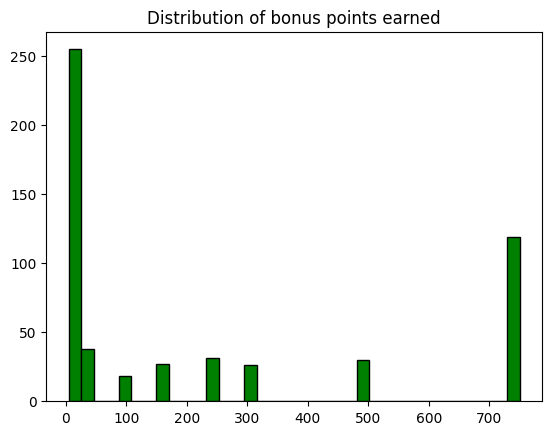

In [9]:
#The distribution of bonus points earned
plt.hist(df['bonusPointsEarned'], color = 'green', edgecolor = 'black',bins = int(180/5))
plt.title('Distribution of bonus points earned')
plt.show()

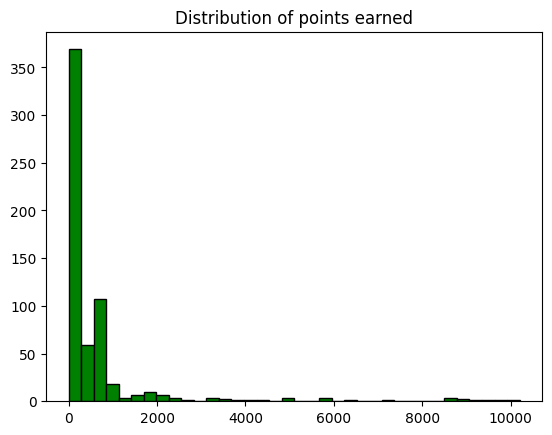

In [10]:
#The distribution of points earned
df['pointsEarned'] = df['pointsEarned'].astype('float64',copy=True) #Change the data type
plt.hist(df['pointsEarned'], color = 'green', edgecolor = 'black',bins = int(180/5))
plt.title('Distribution of points earned')
plt.show()

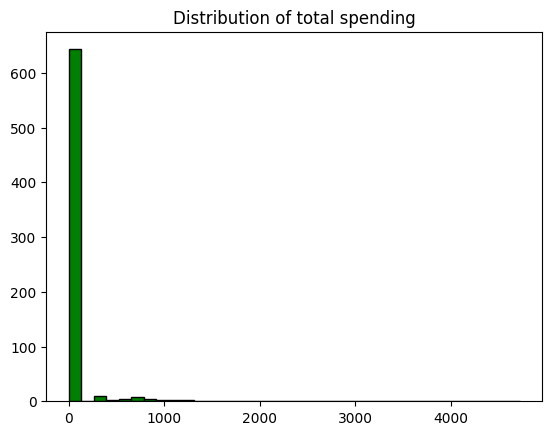

In [11]:
#The distribution of total spending
df['totalSpent'] = df['totalSpent'].astype('float64',copy=True) #Change the data type
plt.hist(df['totalSpent'], color = 'green', edgecolor = 'black',bins = int(180/5))
plt.title('Distribution of total spending')
plt.show()

As show in the plots, none of the three distribution is normal distributed. This could be a sign of lacking data. We should use more receipt data for further analysis, otherwise there would be many biases in the result.

### Issue3: Unreasonable data

In [12]:
reject = df[df['rewardsReceiptStatus']=='REJECTED']
print(reject['bonusPointsEarned'].mean())
print(reject['pointsEarned'].mean())

113.27586206896552
113.27586206896552


In [13]:
finish = df[df['rewardsReceiptStatus']=='FINISHED']
print(finish['bonusPointsEarned'].mean())
print(finish['pointsEarned'].mean())

240.83991228070175
544.6648648648649


From the data above, we can learn that there still are some points earned under the status of reject, even though it is less than finish status. It is unreasonable for reject status to have points so that we need to further check why this happened.